In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Importing the basic necessary python libraries and modules***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Reading the dataset

project_path = '/content/drive/My Drive/Assignment/'
file_name ='input_data.xlsx'

In [14]:
df=pd.read_excel(project_path+file_name)

#Displaying the top 10 rows of the dataframe
df.head(10)

Short description  ... Assignment group
0                                        login issue  ...            GRP_0
1                                            outlook  ...            GRP_0
2                                 cant log in to vpn  ...            GRP_0
3                      unable to access hr_tool page  ...            GRP_0
4                                       skype error   ...            GRP_0
5     unable to log in to engineering tool and skype  ...            GRP_0
6  event: critical:HostName_221.company.com the v...  ...            GRP_1
7  ticket_no1550391- employment status - new non-...  ...            GRP_0
8               unable to disable add ins on outlook  ...            GRP_0
9                    ticket update on inplant_874773  ...            GRP_0

[10 rows x 4 columns]

In [15]:
#Displaying the data type of each attribute

df.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
dtype: object

In [17]:
#Displaying the shape of the dataframe

df.shape

(8500, 4)

*This shows that there are 8500 rows and 4 attributes in the dataframe.*

In [19]:
# Displaying the information regarding the attributes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [18]:
#Checking the null/missing values in the dataframe

df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [20]:
!pip install missingno

In [23]:
import missingno as msno

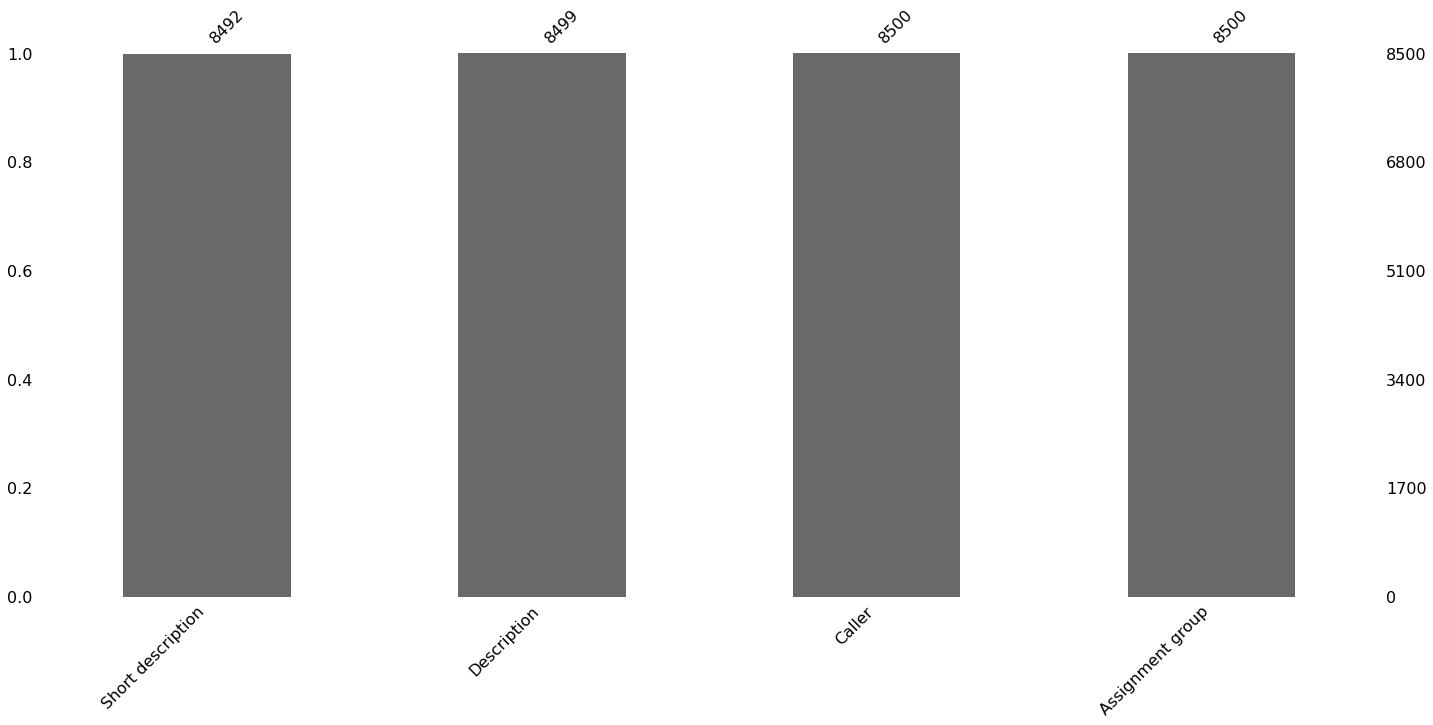

In [25]:
# Visualizing the number of missing values as a bar chart  

msno.bar(df)

*Thus we can observe from here that their are total 8 NaN values in short description and 1 NaN value in Description attribute*

In [28]:
# Checking number of unique groups in the dataframe

df['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

*From this we can observe that their are total 74 unique target groups in our dataframe*

In [41]:
df["Assignment group"].describe()

count      8500
unique       74
top       GRP_0
freq       3976
Name: Assignment group, dtype: object

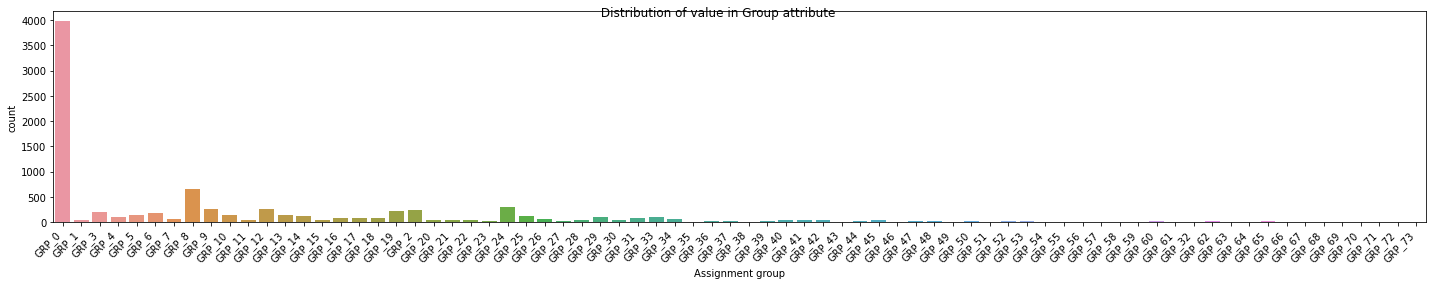

In [38]:
#Displaying the distribution of the values in Assignment group attribute

import seaborn as sns
import warnings

fig, assignplot = plt.subplots(figsize=(20,4))
fig.suptitle(" Distribution of value in Group attribute")
assignplot = sns.countplot(data = df,x= "Assignment group")
assignplot.set_xticklabels(assignplot.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

*From this we can observe that Assignment group attribute is highly right skewed . Also, more than 50% of the data i.e, around 3976 records falls under Group 1 , thus implying that the dataframe is exteremly imbalance.*

In [44]:
#Displaying NaN value in Short Description and Description

df[df.isnull().any(axis=1)]

Short description  ... Assignment group
2604                       NaN  ...           GRP_34
3383                       NaN  ...            GRP_0
3906                       NaN  ...            GRP_0
3910                       NaN  ...            GRP_0
3915                       NaN  ...            GRP_0
3921                       NaN  ...            GRP_0
3924                       NaN  ...            GRP_0
4341                       NaN  ...            GRP_0
4395  i am locked out of skype  ...            GRP_0

[9 rows x 4 columns]

In [58]:
df['Short description'].fillna(df['Description'],inplace=True)
df['Description'].fillna(df['Short description'],inplace=True)

In [59]:
#Again Checking the null/missing values in the dataframe

df.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [60]:
df_copy = df[['Short description', 'Description', 'Caller','Assignment group']].copy()
duplicateRowsDF = df_copy[df_copy.duplicated()]
duplicateRowsDF

Short description  ... Assignment group
51                           call for ecwtrjnq jpecxuty  ...            GRP_0
229                          call for ecwtrjnq jpecxuty  ...            GRP_0
493                     ticket update on inplant_872730  ...            GRP_0
512                                    blank call //gso  ...            GRP_0
667   job bkbackup_tool_powder_prod_full failed in j...  ...            GRP_8
...                                                 ...  ...              ...
7836             probleme mit erpgui \tmqfjard qzhgdoua  ...           GRP_24
8051               issue on pricing in distributor_tool  ...           GRP_21
8093  reset passwords for prgthyuulla ramdntythanjes...  ...           GRP_17
8347                           blank call // loud noise  ...            GRP_0
8405                           unable to launch outlook  ...            GRP_0

[83 rows x 4 columns]

In [62]:
# Remove Duplicates
df_updt =df.drop_duplicates(['Short description', 'Description', 'Caller', 'Assignment group'])

In [87]:
#Before cleaning the garbled data
df_updt["Description"][186]

'from:  \nsent: friday, october 28, 2016 7:20 am\nto: nwfodmhc exurcwkm\nsubject: re: é\x9d’å²›å…´å\x90ˆæœºç”µshipment notificationé‚®ç®±è®¾ç½®\n\ndearï¼Œ\npls help to update customer 4563729890 shipment notification email address :  abcdegy@gmail.com \n\n\nb. '

In [94]:
df_updt["Description"][281]

'from: brdhdd dhwduw\nsent: thursday, october 27, 2016 6:12 am\nto: nwfodmhc exurcwkm\nsubject::fwd: unable to down load ethics module \n\n\nbegin forwarded message:\nfrom:  <dqwhpjxy.pozjxbey@gmail.com>\nto:  <zanivrec.capbfhur@gmail.com>\nsubject: unable to down load ethics module \nhi  â€“ trust doing well . i am unable to down load & getting below msg. i did reset resolution however still same issue persist.\n \nplease help.\n \n \n \n \n \ndirector of sales \ncompany indirect channels  - asia \n& \ndqwhpjxy.pozjxbey@gmail.com \n\n \n \n \n \n\n\n'

In [69]:
# Merging the Short Description and Description Columns
df_con = pd.DataFrame({"Description": df_updt["Short description"] + " " + df_updt["Description"],
                             "AssignmentGroup": df_updt["Assignment group"],  "Caller": df_updt["Caller"]}, 
                                                       columns=["Description","AssignmentGroup","Caller"])

In [72]:
! pip install ftfy

     |████████████████████████████████| 71kB 1.9MB/s 
  Created wheel for ftfy: filename=ftfy-5.8-cp36-none-any.whl size=45612 sha256=1e408a666f47d81c8e101e051001b083c154a7ebf27fe2fe1a9fd01c3e125ab8
  Stored in directory: /root/.cache/pip/wheels/ba/c0/ef/f28c4da5ac84a4e06ac256ca9182fc34fa57fefffdbc68425b
Successfully built ftfy


In [73]:
from ftfy import *

In [79]:
df_con

Description  ...             Caller
0     login issue -verified user details.(employee# ...  ...  spxjnwir pjlcoqds
1     outlook \n\nreceived from: hmjdrvpb.komuaywn@g...  ...  hmjdrvpb komuaywn
2     cant log in to vpn \n\nreceived from: eylqgodm...  ...  eylqgodm ybqkwiam
3     unable to access hr_tool page unable to access...  ...  xbkucsvz gcpydteq
4                             skype error  skype error   ...  owlgqjme qhcozdfx
...                                                 ...  ...                ...
8495  emails not coming in from zz mail \n\nreceived...  ...  avglmrts vhqmtiua
8496  telephony_software issue telephony_software issue  ...  rbozivdq gmlhrtvp
8497  vip2: windows password reset for tifpdchb pedx...  ...  oybwdsgx oxyhwrfz
8498  machine não está funcionando i am unable to ac...  ...  ufawcgob aowhxjky
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...  kqvbrspl jyzoklfx

[8417 rows x 3 columns]

In [77]:
df_con['Description'] = df_con['Description'].apply(fix_text)


In [86]:
#After using fify.fix_text on the given dataframe
df_con["Description"][186]

'青岛兴合机电shipment notification邮箱设置 from:  \nsent: friday, october 28, 2016 7:20 am\nto: nwfodmhc exurcwkm\nsubject: re: 青岛兴合机电shipment notification邮箱设置\n\ndear,\npls help to update customer 4563729890 shipment notification email address :  abcdegy@gmail.com \n\n\nb. '

In [93]:
df_con["Description"][281]

'unable to down load ethics module  from: brdhdd dhwduw\nsent: thursday, october 27, 2016 6:12 am\nto: nwfodmhc exurcwkm\nsubject::fwd: unable to down load ethics module \n\n\nbegin forwarded message:\nfrom:  <dqwhpjxy.pozjxbey@gmail.com>\nto:  <zanivrec.capbfhur@gmail.com>\nsubject: unable to down load ethics module \nhi  – trust doing well . i am unable to down load & getting below msg. i did reset resolution however still same issue persist.\n \nplease help.\n \n \n \n \n \ndirector of sales \ncompany indirect channels  - asia \n& \ndqwhpjxy.pozjxbey@gmail.com \n\n \n \n \n \n\n\n'

In [100]:
from dateutil import parser
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

import re         
def clean_data(text):
    text=text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove Non Dictionary character-TODO
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    
    return text
  
df_con["Description"] = df_con["Description"].apply(clean_data)

In [101]:
df_con["Description"][281]

'unable to down load ethics module brdhdd dhwduw am nwfodmhc exurcwkm fwd unable to down load ethics module begin forwarded message unable to down load ethics module hi trust doing well i am unable to down load and getting below msg i did reset resolution however still same issue persist please help director of sales company indirect channels asia and'

In [127]:
nltk.download('stopwords')
stop = set(stopwords.words('english')) 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [128]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [129]:
temp =[]
for sentence in df_con["Description"]:
    sentence = sentence.lower()
    l_sentence = lemmatize_sentence(sentence)
    words = [word for word in l_sentence.split() if word not in stopwords.words('english')]
    temp.append(words)
    

In [130]:
df_con["Lemmatized_clean"] = temp

In [131]:
df_con.to_excel("TempOutput.xlsx")

In [138]:
df_con.head()

Description  ...                                   Lemmatized_clean
0  login issue verified user details employee and...  ...  [login, issue, verify, user, detail, employee,...
1  outlook hello team my meetings skype meetings ...  ...  [outlook, hello, team, meeting, skype, meeting...
2  cant log in to vpn hi i cannot log on to vpn best  ...               [cant, log, vpn, hi, log, vpn, best]
3  unable to access hr tool page unable to access...  ...  [unable, access, hr, tool, page, unable, acces...
4                            skype error skype error  ...                       [skype, error, skype, error]

[5 rows x 5 columns]

In [139]:
df_con.isnull().sum()

Description               0
AssignmentGroup           0
Caller                    0
Translated description    0
Lemmatized_clean          0
dtype: int64

In [164]:
df_con1=df_con
df_con1.drop("GRP_NO", axis =1)

Description  ...                                   Lemmatized_clean
0     login issue verified user details employee and...  ...  [login, issue, verify, user, detail, employee,...
1     outlook hello team my meetings skype meetings ...  ...  [outlook, hello, team, meeting, skype, meeting...
2     cant log in to vpn hi i cannot log on to vpn best  ...               [cant, log, vpn, hi, log, vpn, best]
3     unable to access hr tool page unable to access...  ...  [unable, access, hr, tool, page, unable, acces...
4                               skype error skype error  ...                       [skype, error, skype, error]
...                                                 ...  ...                                                ...
8495  emails not coming in from zz mail good afterno...  ...  [email, come, zz, mail, good, afternoon, recei...
8496  telephony software issue telephony software issue  ...  [telephony, software, issue, telephony, softwa...
8497  vip windows password reset for tifpdchb pedxru...  ...  [vip, window, password, reset, tifpdchb, pedxr...
8498  machine n o est funcionando i am unable to acc...  ...  [machine, n, est, funcionando, unable, access,...
8499  an mehreren pc s lassen sich verschiedene prgr...  ...  [mehreren, pc, lassen, sich, verschiedene, prg...

[8417 rows x 5 columns]

In [169]:
from wordcloud import WordCloud
def wordcloud_grp(f, x):
    wordclouds_0=' '.join(map(str, f))

    wc = WordCloud(background_color='white',width=480, height=480, max_font_size=40, min_font_size=10, max_words=50).generate(wordclouds_0)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(x))
    plt.margins(x=0, y=0)
    plt.show()


In [170]:

value = df_con1['AssignmentGroup'].value_counts().sort_values(ascending=False).index
value



Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_4', 'GRP_29', 'GRP_18', 'GRP_16', 'GRP_31', 'GRP_17',
       'GRP_7', 'GRP_34', 'GRP_26', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_30',
       'GRP_15', 'GRP_42', 'GRP_20', 'GRP_45', 'GRP_1', 'GRP_22', 'GRP_11',
       'GRP_21', 'GRP_47', 'GRP_23', 'GRP_62', 'GRP_48', 'GRP_39', 'GRP_27',
       'GRP_60', 'GRP_37', 'GRP_36', 'GRP_44', 'GRP_50', 'GRP_65', 'GRP_53',
       'GRP_52', 'GRP_55', 'GRP_51', 'GRP_59', 'GRP_49', 'GRP_46', 'GRP_43',
       'GRP_66', 'GRP_32', 'GRP_38', 'GRP_63', 'GRP_68', 'GRP_58', 'GRP_56',
       'GRP_54', 'GRP_69', 'GRP_71', 'GRP_72', 'GRP_57', 'GRP_73', 'GRP_67',
       'GRP_61', 'GRP_64', 'GRP_70', 'GRP_35'],
      dtype='object')

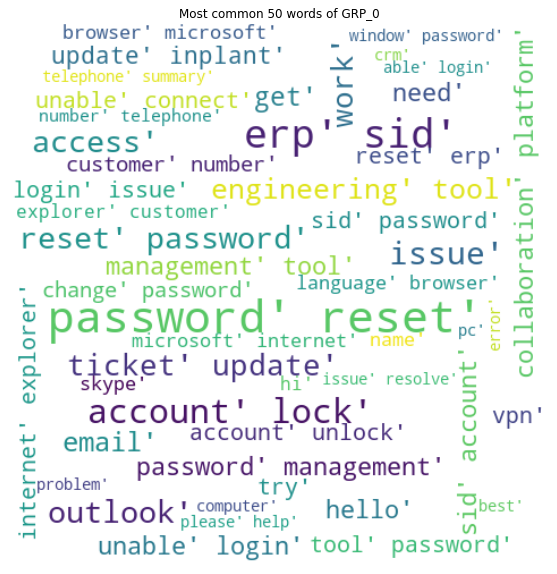

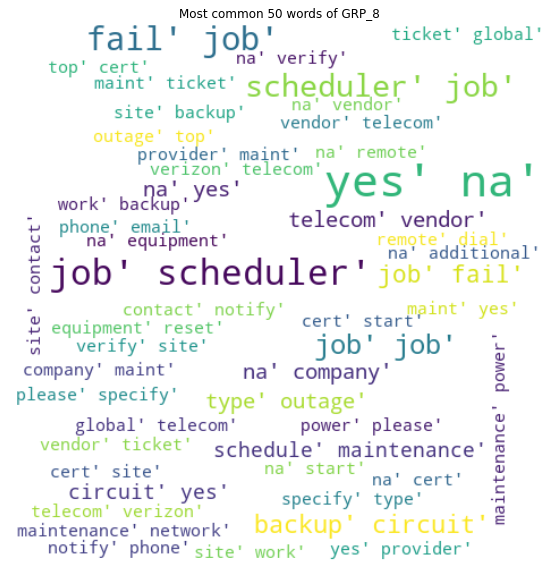

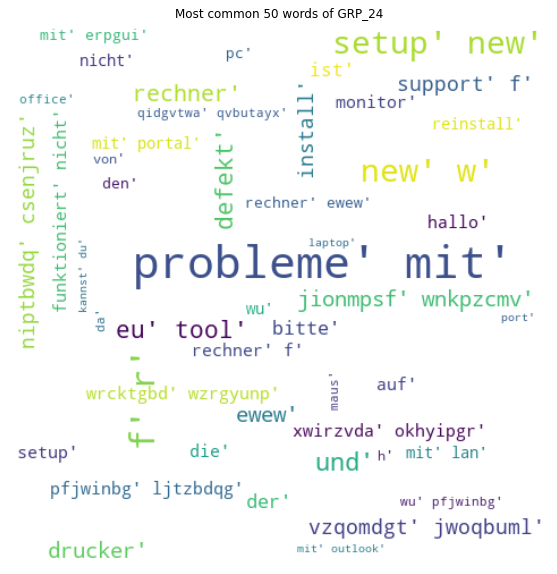

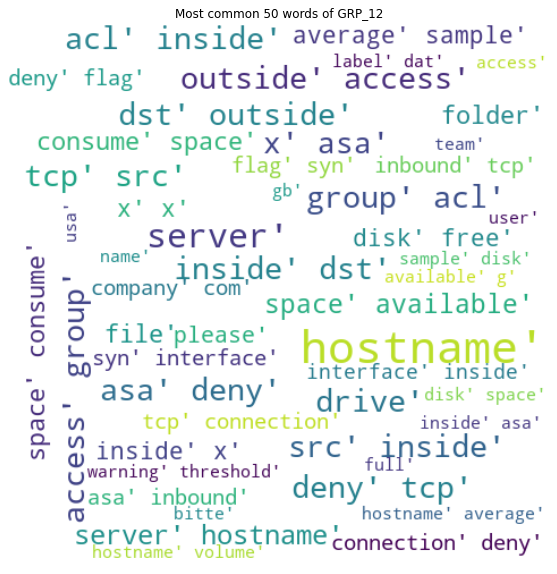

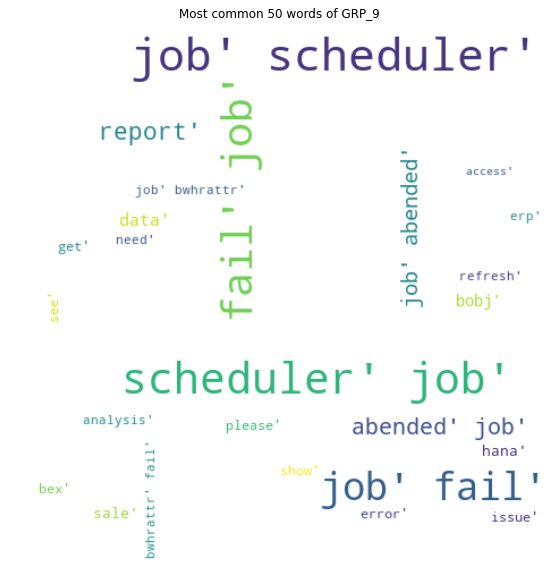

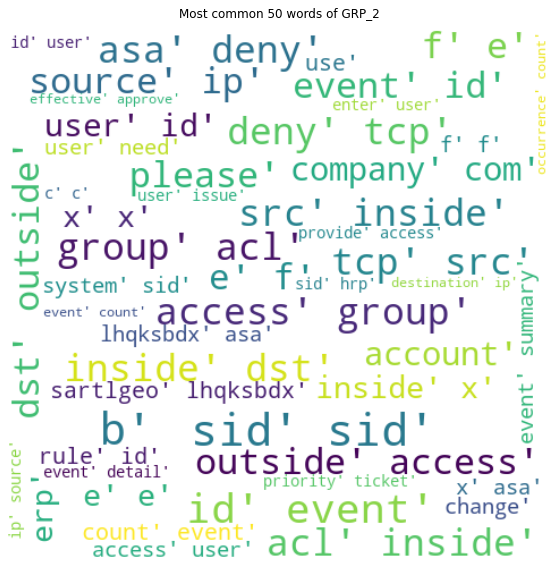

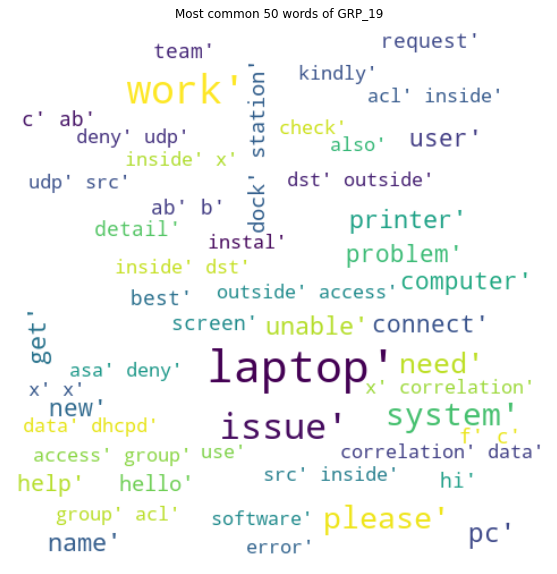

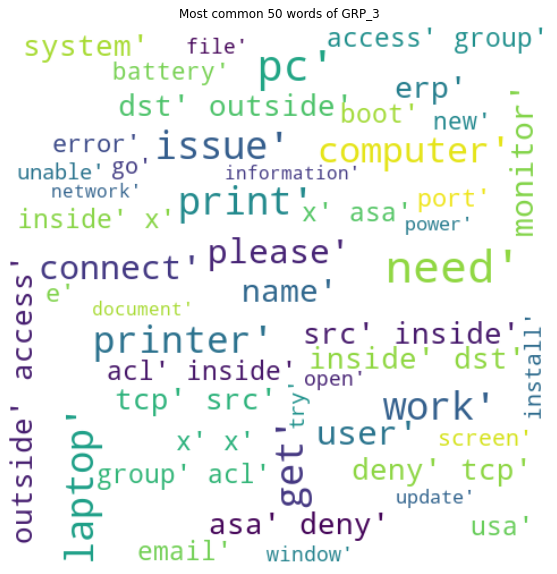

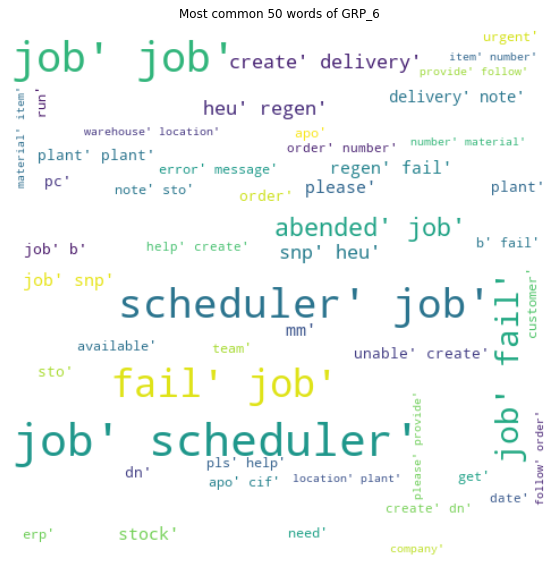

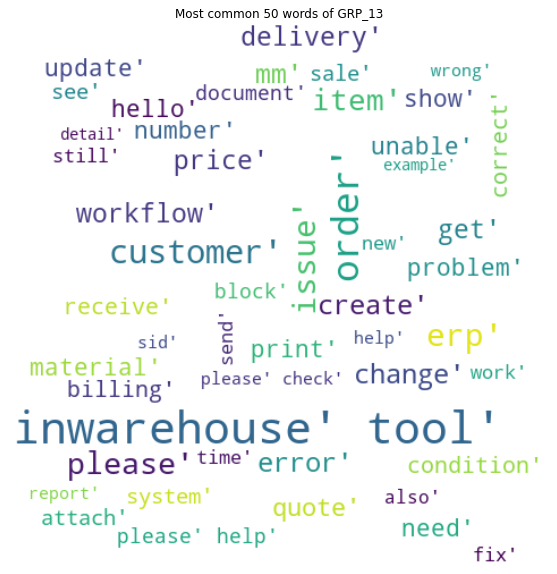

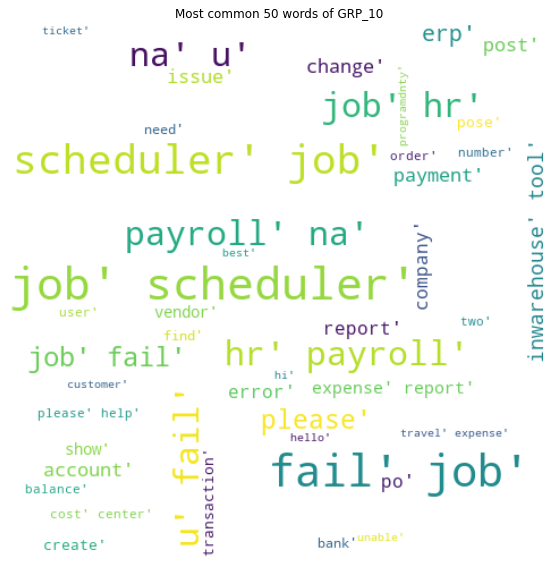

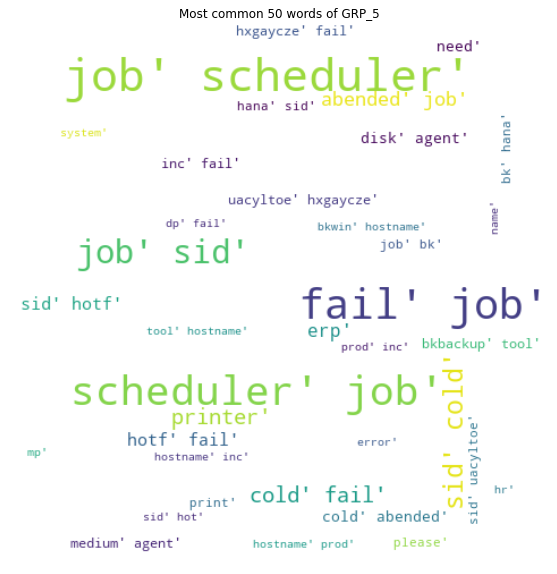

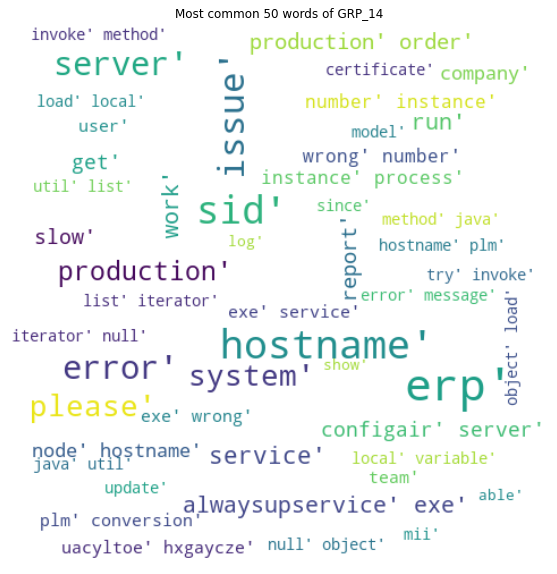

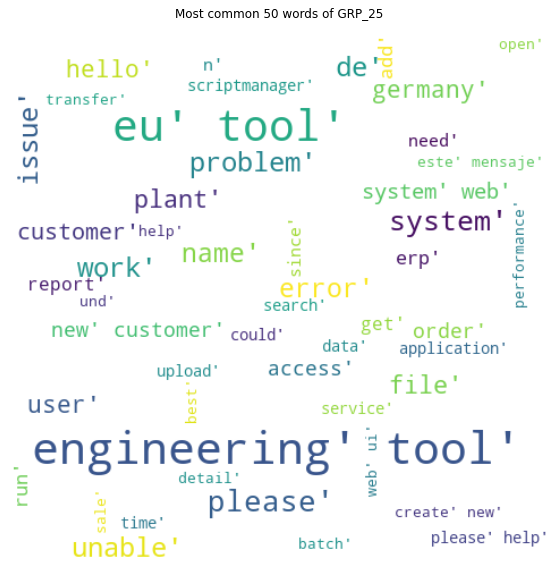

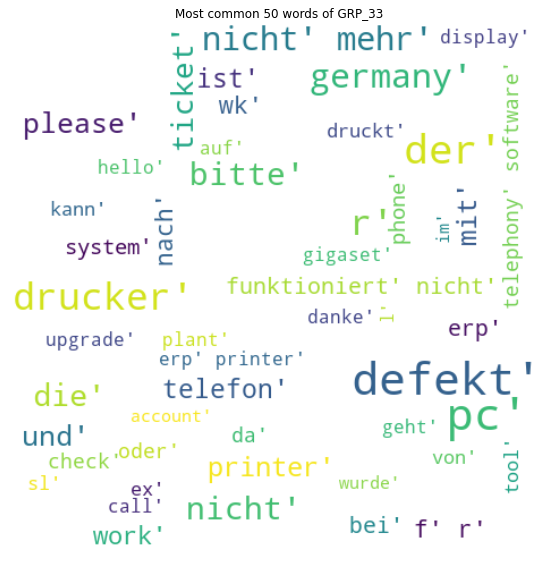

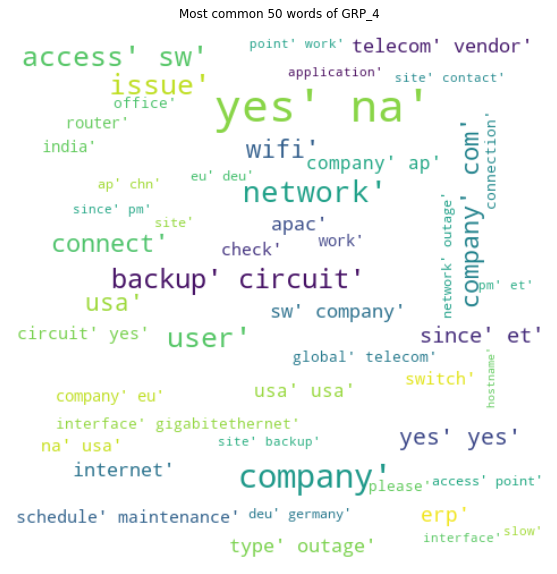

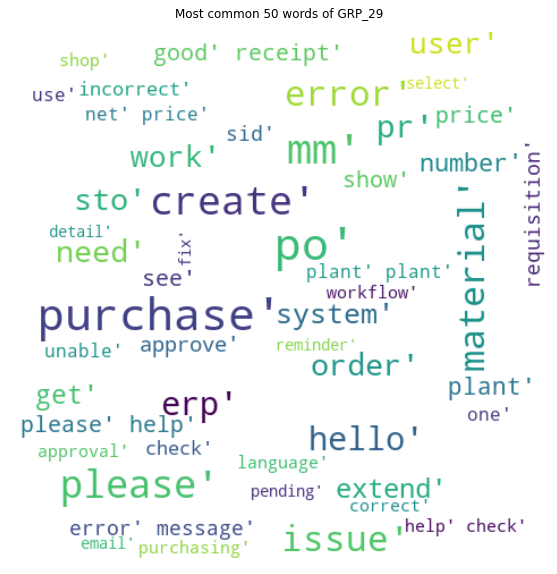

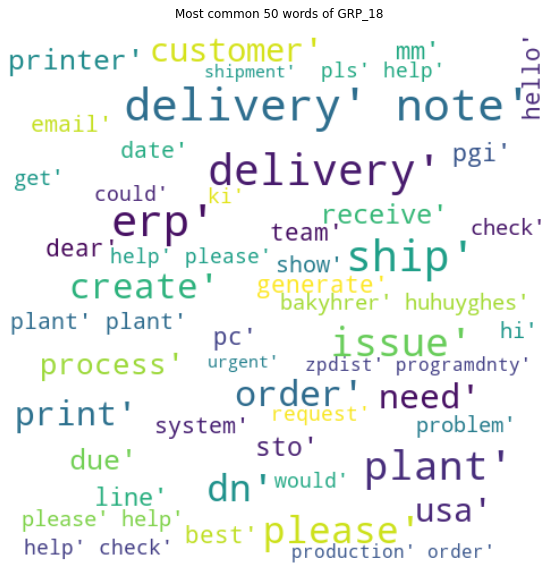

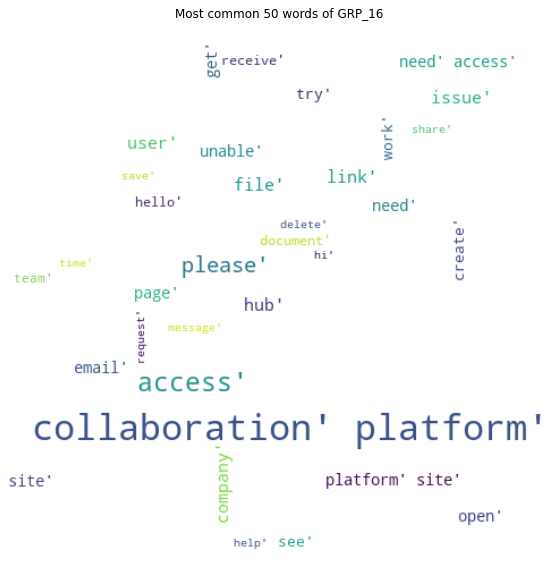

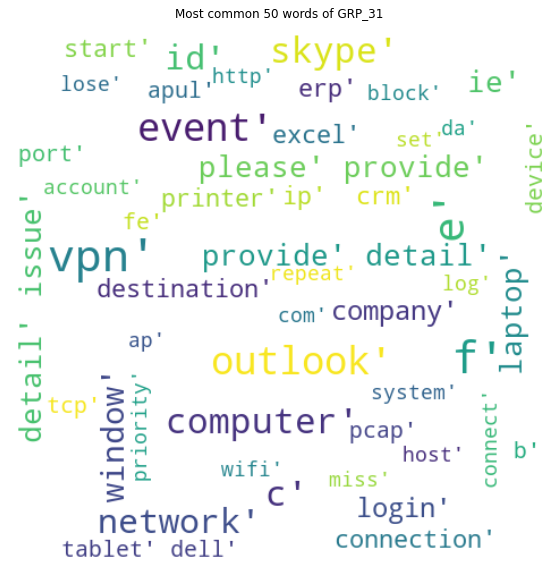

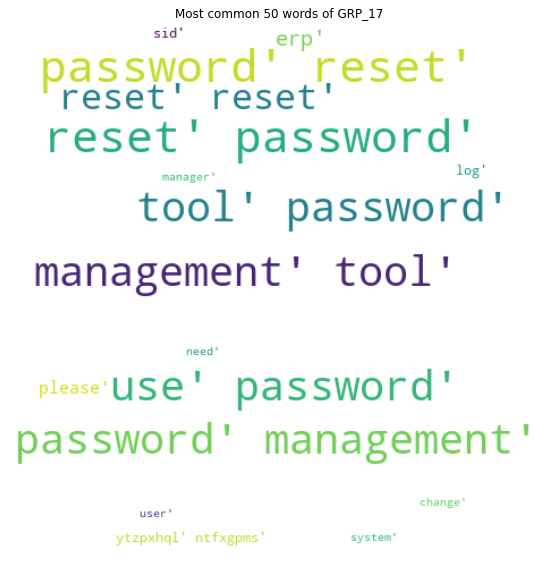

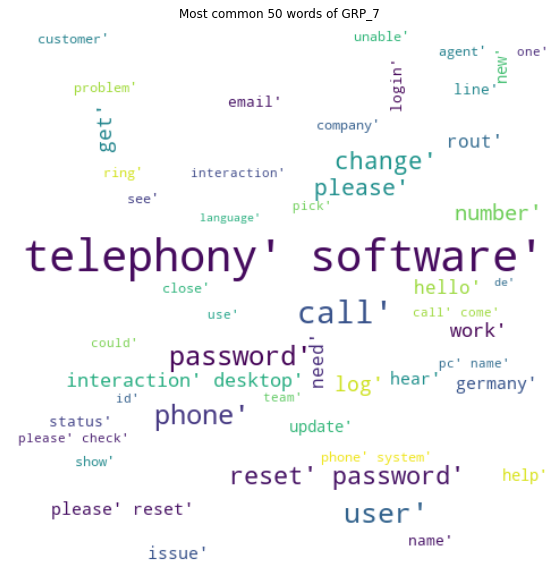

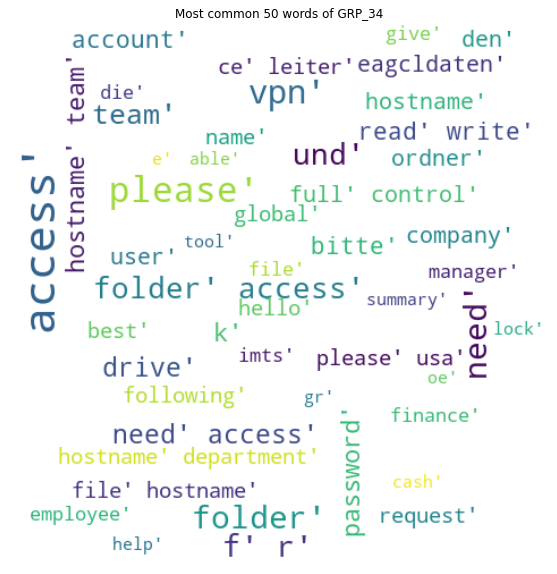

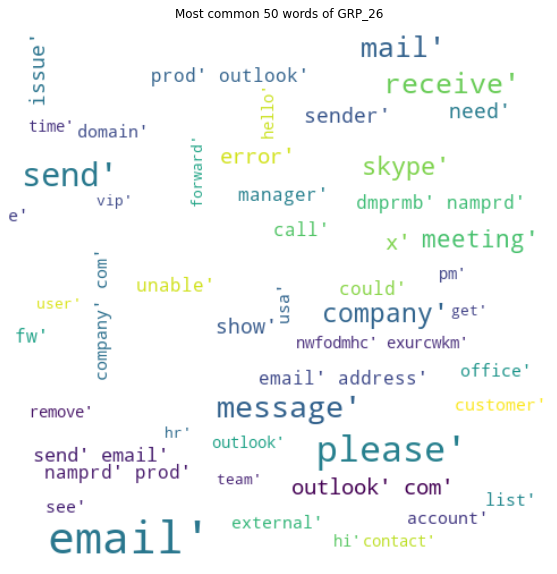

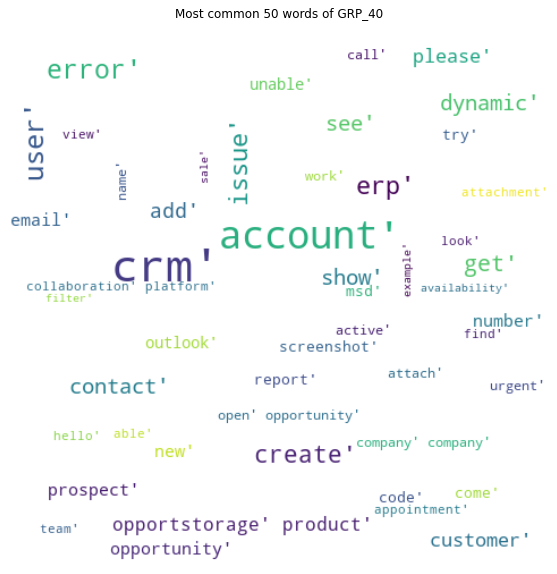

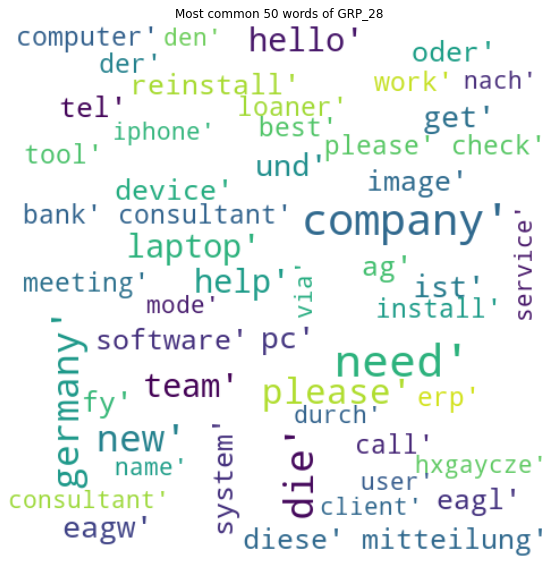

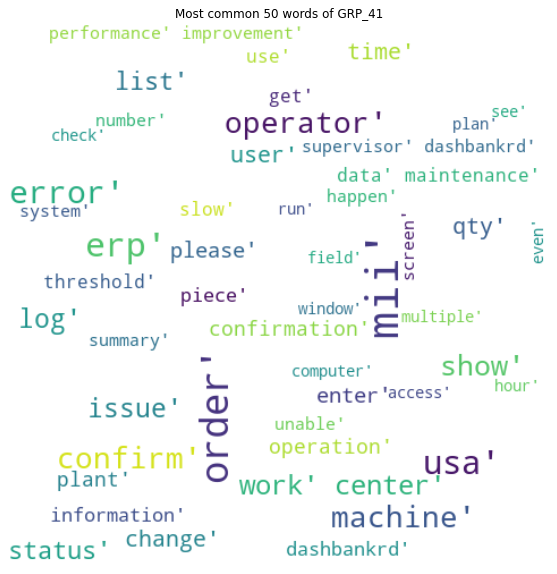

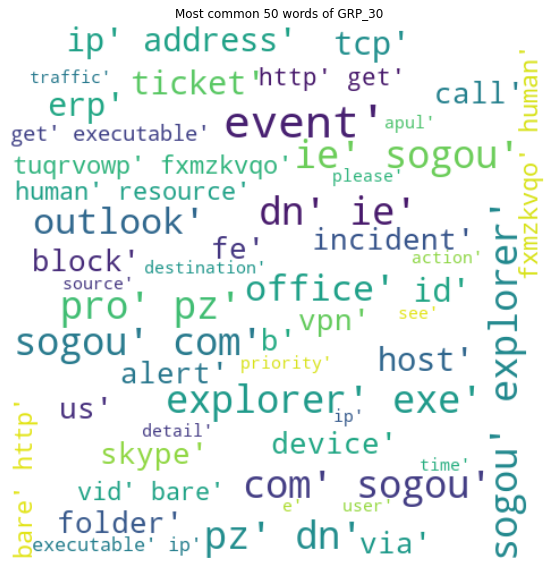

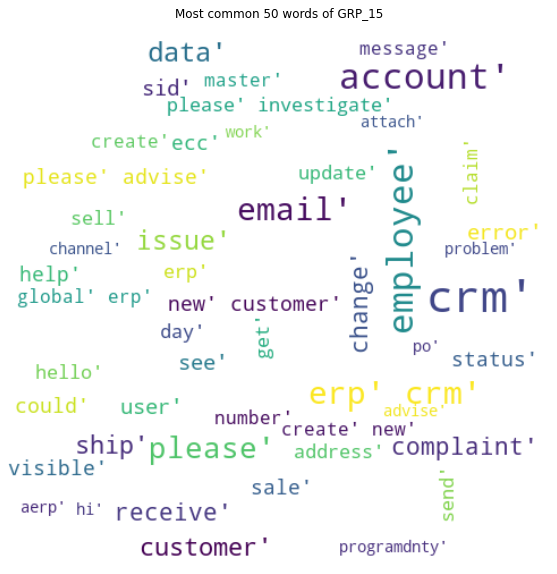

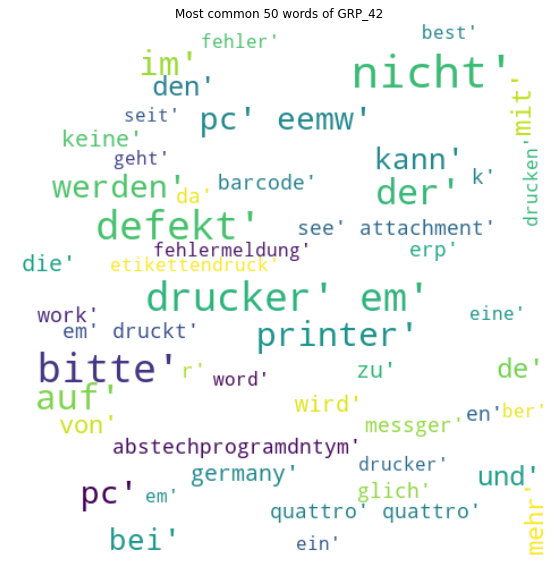

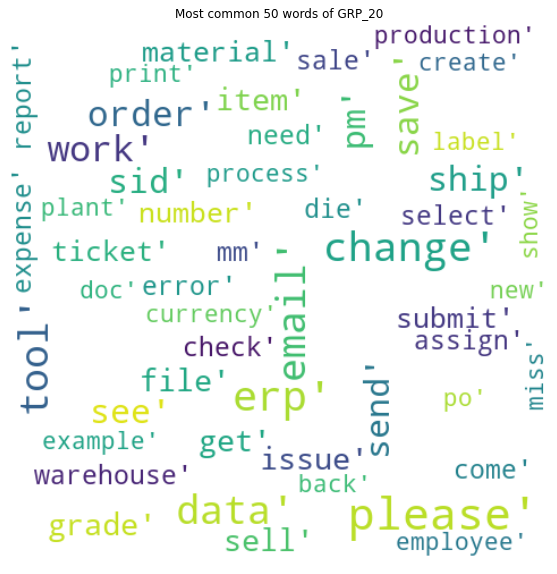

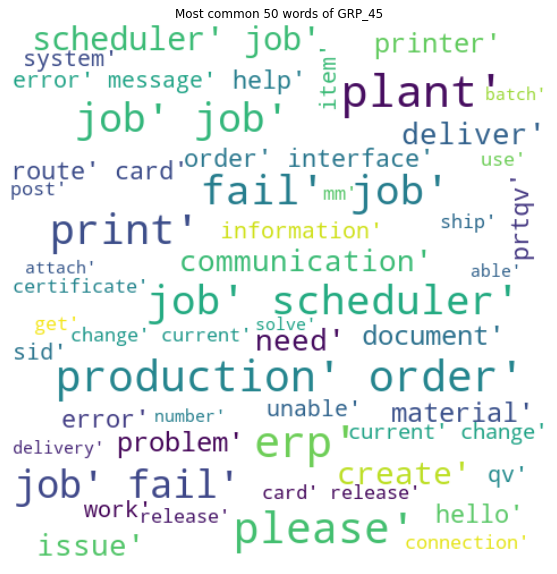

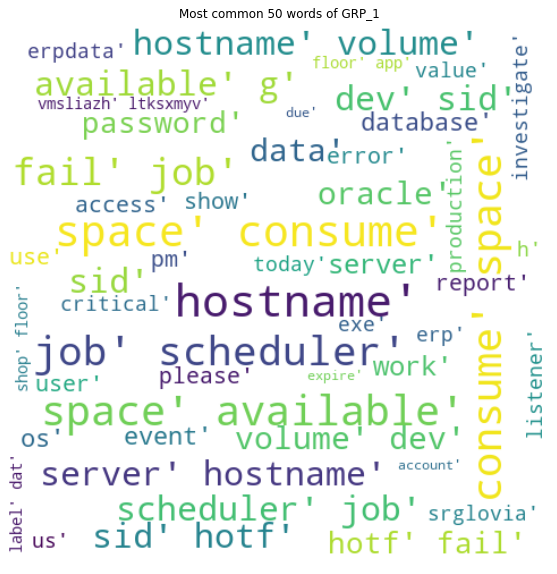

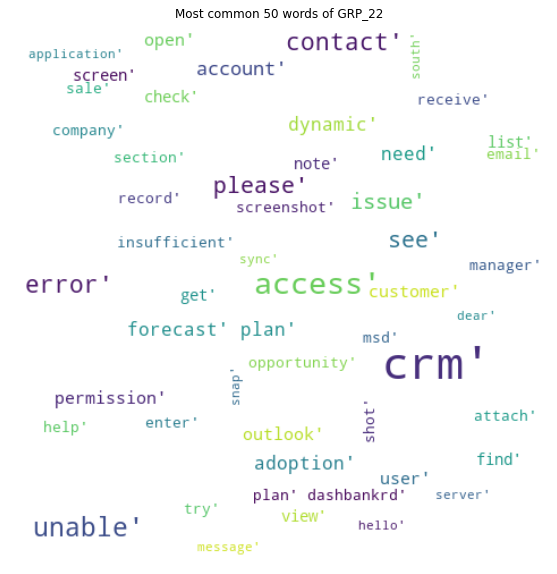

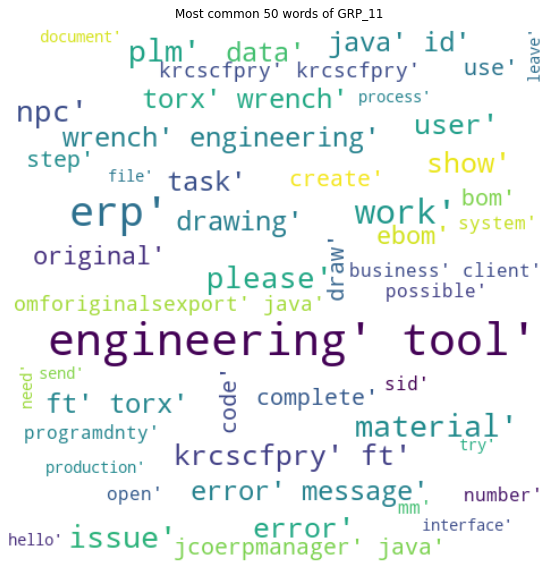

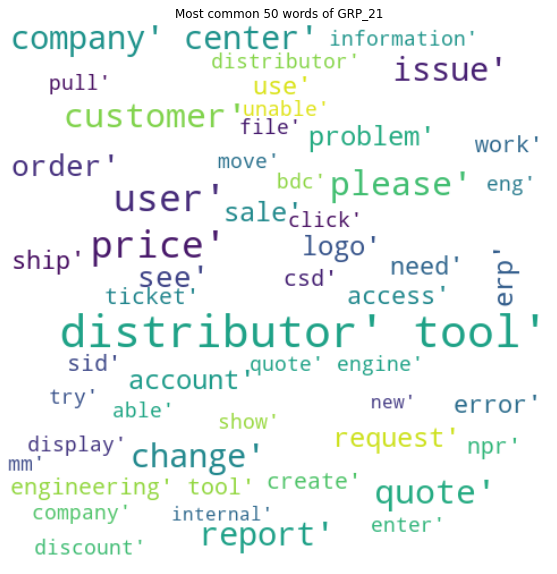

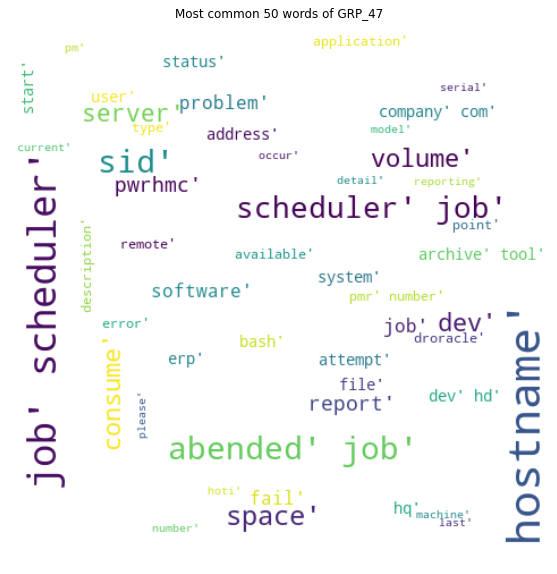

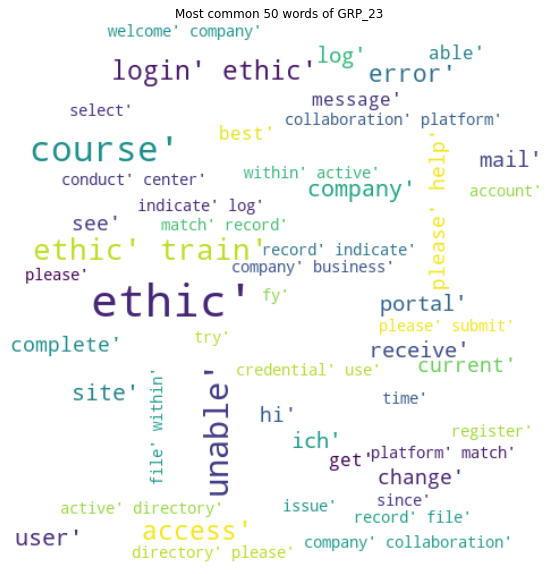

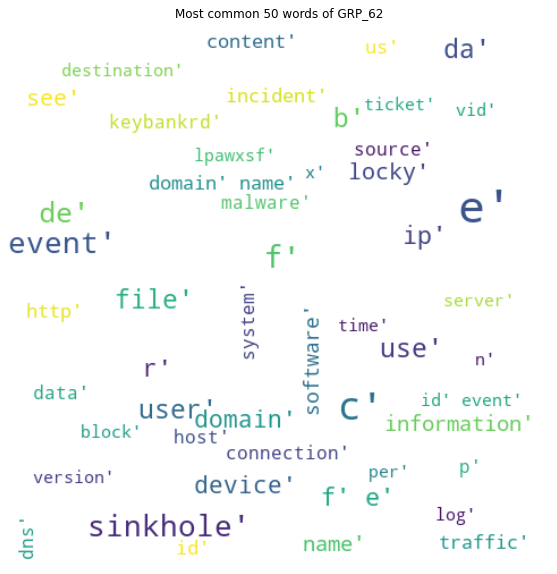

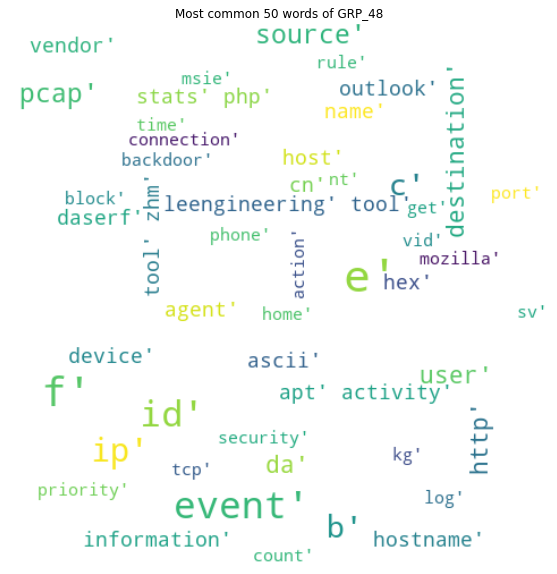

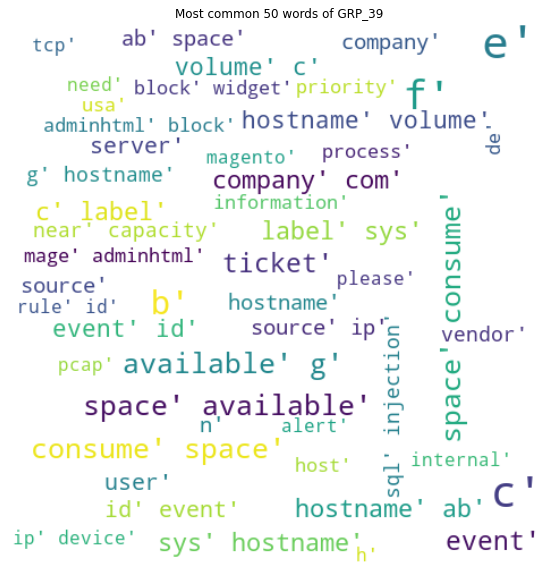

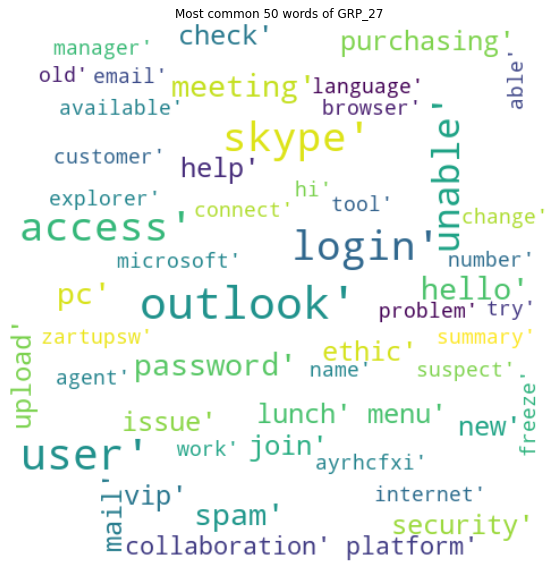

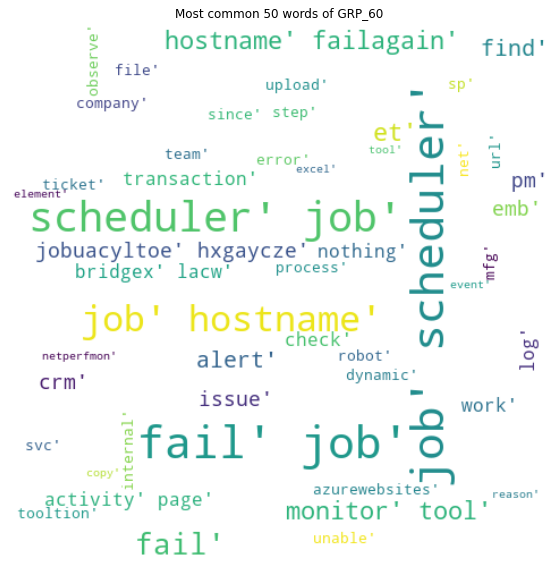

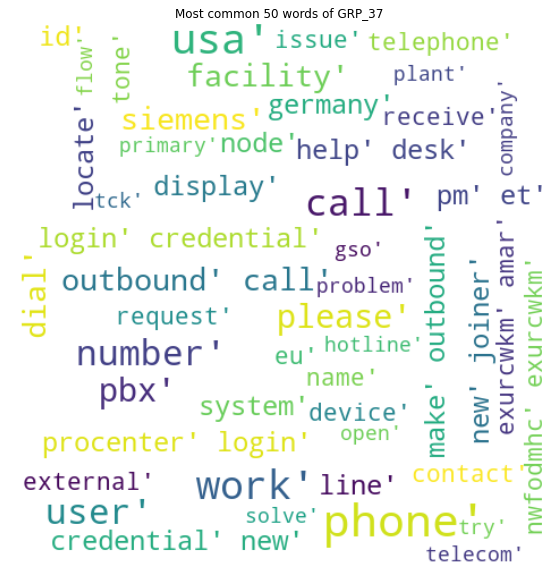

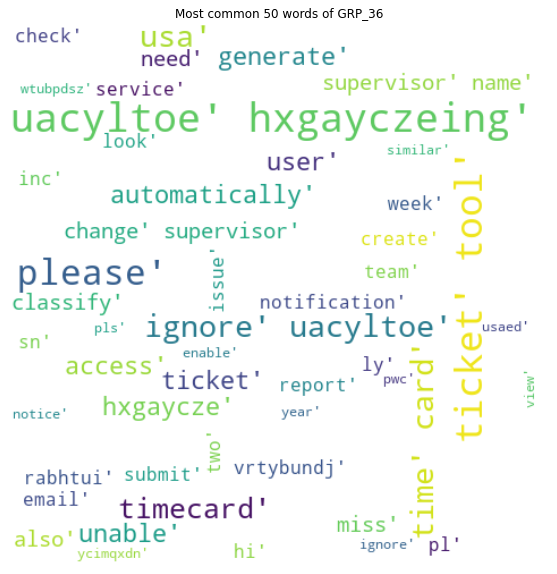

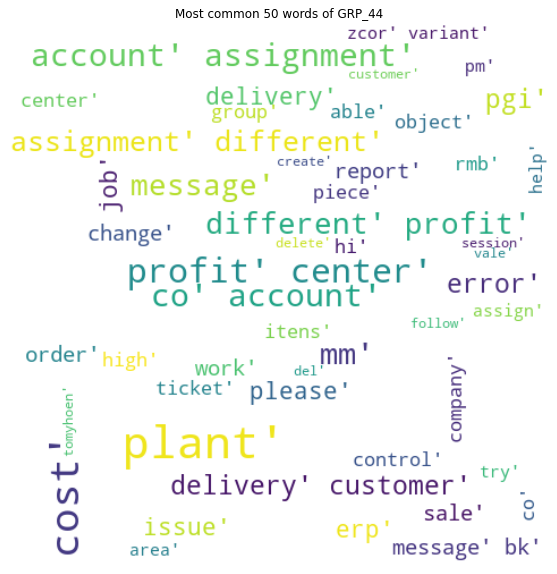

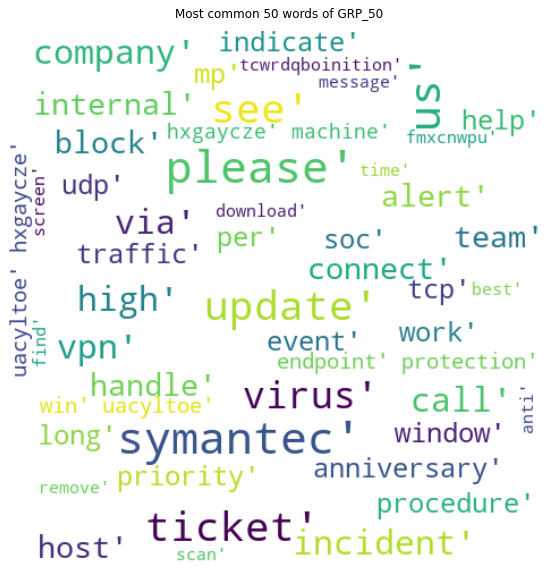

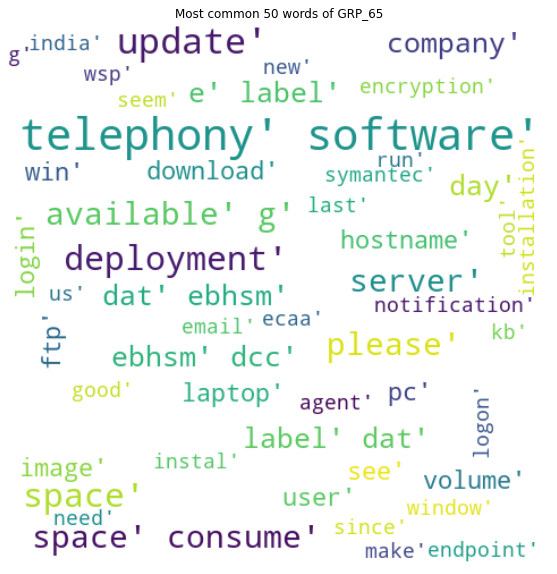

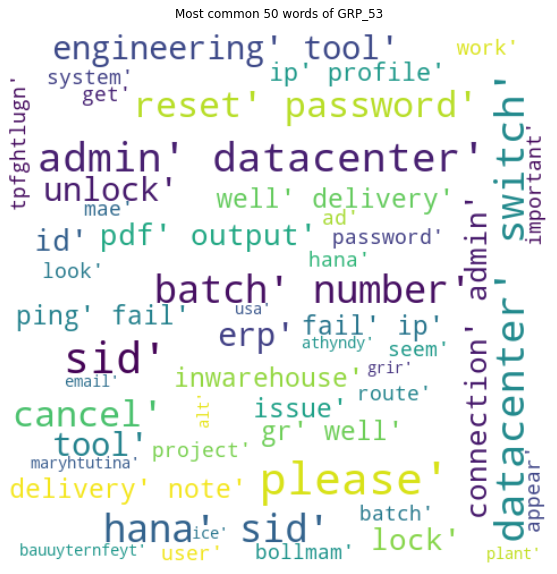

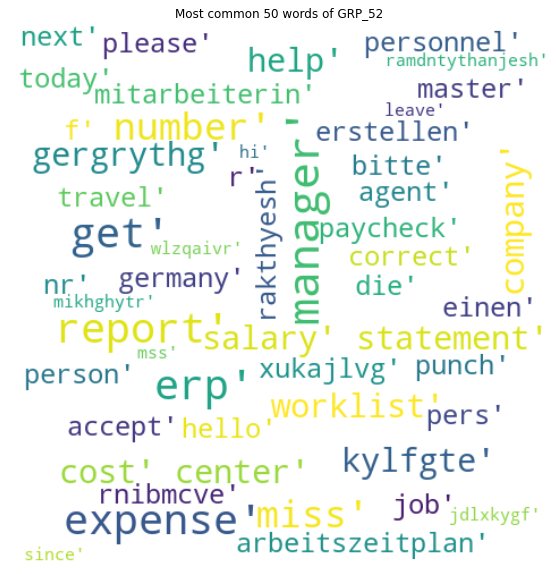

In [171]:
for i in range(50):

    Grp = df_con1[df_con1['AssignmentGroup'] == value[i]]
    Grp = Grp['Lemmatized_clean']
    wordcloud_grp(Grp,value[i])

In [173]:
max_features = 10000
maxlen = 25
embedding_size = 200

In [176]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df_con["Description"].values)
X = tokenizer.texts_to_sequences(df_con["Description"].values)

In [175]:
sequences = tokenizer.texts_to_sequences(df_con["Description"].values)
X = pad_sequences(sequences, maxlen = maxlen)

print(len(X))


8417


In [177]:
tokenizer.word_index

{'to': 1,
 'the': 2,
 'in': 3,
 'job': 4,
 'is': 5,
 'and': 6,
 'no': 7,
 'on': 8,
 'not': 9,
 'i': 10,
 'for': 11,
 'at': 12,
 'a': 13,
 'password': 14,
 'please': 15,
 'erp': 16,
 'yes': 17,
 'na': 18,
 'scheduler': 19,
 'of': 20,
 'tool': 21,
 'it': 22,
 'failed': 23,
 'company': 24,
 'sid': 25,
 'this': 26,
 'reset': 27,
 'unable': 28,
 'user': 29,
 'access': 30,
 'issue': 31,
 'account': 32,
 'ticket': 33,
 'my': 34,
 'with': 35,
 'from': 36,
 'you': 37,
 'have': 38,
 'error': 39,
 'can': 40,
 'hostname': 41,
 'outlook': 42,
 'are': 43,
 'working': 44,
 'am': 45,
 'login': 46,
 'be': 47,
 'that': 48,
 'site': 49,
 'we': 50,
 'help': 51,
 'e': 52,
 'f': 53,
 'when': 54,
 'system': 55,
 'as': 56,
 'need': 57,
 'email': 58,
 'name': 59,
 'id': 60,
 'circuit': 61,
 'power': 62,
 'network': 63,
 's': 64,
 'hello': 65,
 'locked': 66,
 'was': 67,
 'an': 68,
 'but': 69,
 'has': 70,
 'vendor': 71,
 'or': 72,
 'update': 73,
 'if': 74,
 't': 75,
 'x': 76,
 'by': 77,
 'down': 78,
 'new': 79,
